In [2]:
#data
import pandas as pd
import numpy as np

# Customize visualization Seaborn and matplotlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Treemap visualization
import squarify

# date time
from datetime import datetime

import statsmodels.api as sma

In [3]:
df = pd.read_csv("netflix_titles.csv")
df1 = pd.read_csv("titles.csv")


# Cleaning Data

### Missing Value

In [5]:
# sum the number of missing values in this dataset
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
# check null in each column

for i in df.columns:
    null = df[i].isna().sum() / len(df) * 100
    if null > 0 :
        print("{} null rate: {}%".format(i, round(null,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [7]:
# check null in each column
for i in df1.columns:
    null = df1[i].isna().sum() / len(df1) * 100
    if null > 0 :
        print("{} null rate: {}%".format(i, round(null,2)))

title null rate: 0.02%
description null rate: 0.31%
age_certification null rate: 44.77%
seasons null rate: 64.0%
imdb_id null rate: 6.89%
imdb_score null rate: 8.24%
imdb_votes null rate: 8.51%
tmdb_popularity null rate: 1.56%
tmdb_score null rate: 5.32%


In [8]:
# from above result, we can see the director, cast, country, date_added, rating and duration have missing values

# we will fill those missing value 
df.director.fillna("No Director", inplace = True)
df.cast.fillna("No cast", inplace = True)
df.country.fillna("Country Unavailable", inplace = True)

# dropped the rows with NaN values because they are very few and not significant with overall dataset
df.dropna(subset = ["date_added", "rating", "duration"], inplace = True)

In [9]:
# Date time format
#Convert dataframe to Datetime format
df["date_added"] = pd.to_datetime(df["date_added"])
df["added_year"] = df["date_added"].dt.year
df["added_month"] = df["date_added"].dt.month

In [10]:
#Netflix brand colors
colors = ["grey", '#b20710', '#e50914']

#create array with the Netflix colors
sns.set_palette(sns.color_palette(colors))

#  Exploratory Data Analysis

## Types analysis

In [11]:
movies = df[df["type"] == "Movie"]
tvshow = df[df["type"] == "TV Show"]

### 1. What type of media has Netflix produced the most?

Text(0.5, 1.0, 'Distribution of Movies and TV shows')

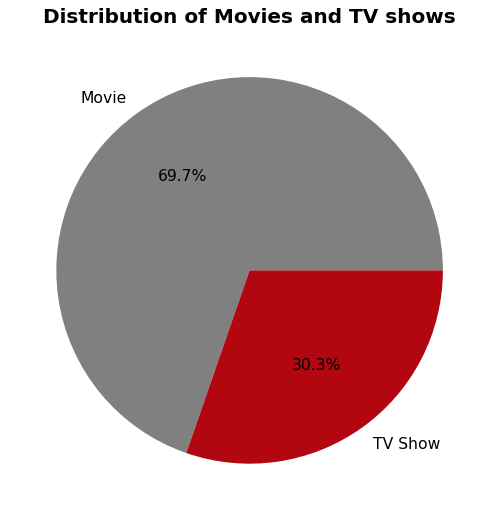

In [12]:
plt.figure(figsize = (12,8), dpi = 80)

plt.pie(df["type"].value_counts(), 
        labels = df["type"].value_counts().index,  
        autopct = "%.1f%%", 
        textprops={'fontsize': 14})

plt.title("Distribution of Movies and TV shows", fontsize = "18", fontweight = "bold")

### 2. Released year vs type of content

In [13]:
year2 = df.loc[df["release_year"] > 2007]

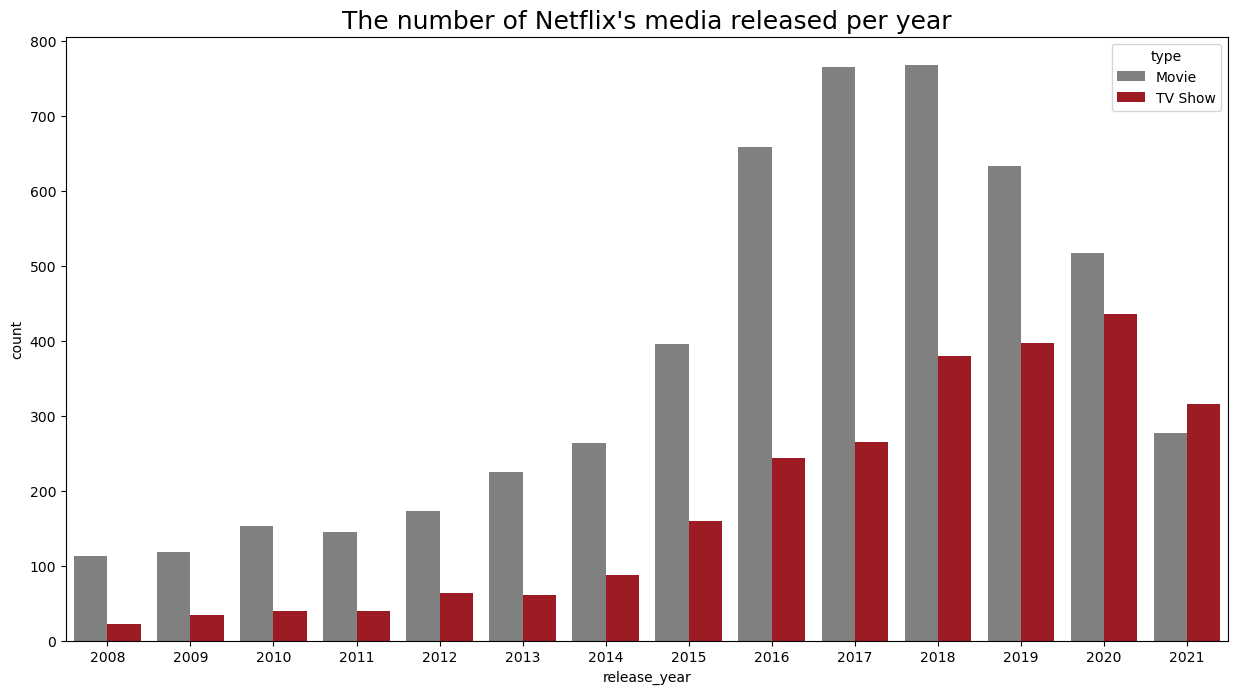

In [14]:
plt.figure(figsize = (15,8), dpi = 100)

sns.countplot(x = "release_year", 
              data = year2,
              hue = year2["type"])
#plt.y
plt.title("The number of Netflix's media released per year", fontsize = 18)
plt.show()

## Rating Analysis

### 3. Content for All the Age groups - who is the target

(0.0, 100.0, 0.0, 100.0)

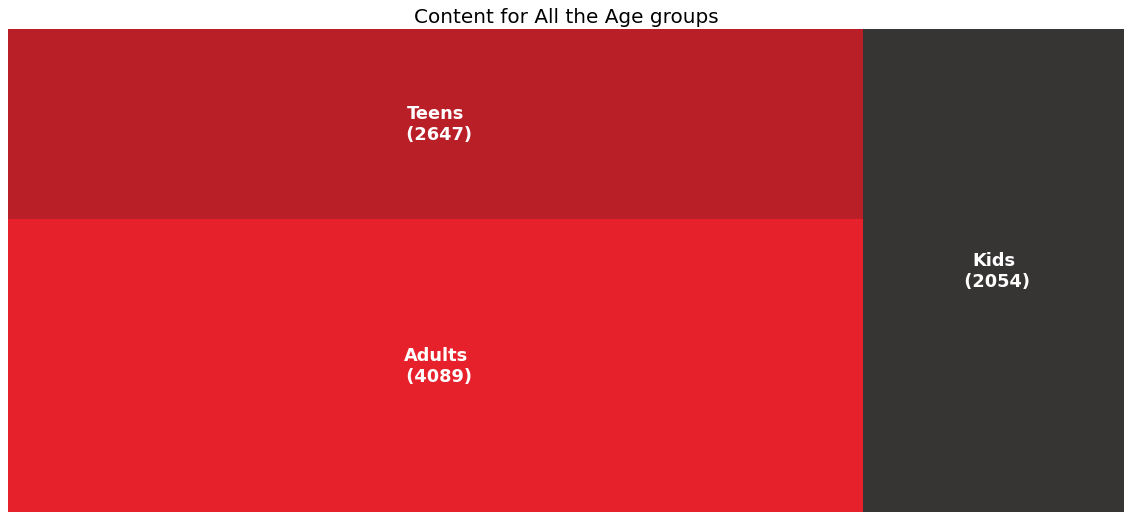

In [16]:
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'}


#creating a new column with age rating
df["age_rating"] = df["rating"].replace(to_replace = rating)

age_ratings = df["age_rating"].value_counts()

labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize = (18,8), dpi = 80)


squarify.plot(sizes = age_ratings.values, 
              label = labels,
              color = ['#e50914', '#b20710','#221f1f'],
              ax = ax, text_kwargs = {'fontsize':'16', 'color': 'white', 'weight':'bold'},
              alpha = 0.9)

ax.set_title("Content for All the Age groups", fontsize = 18)
ax.axis('off')

### 4. Comparing Frequency between type and rating

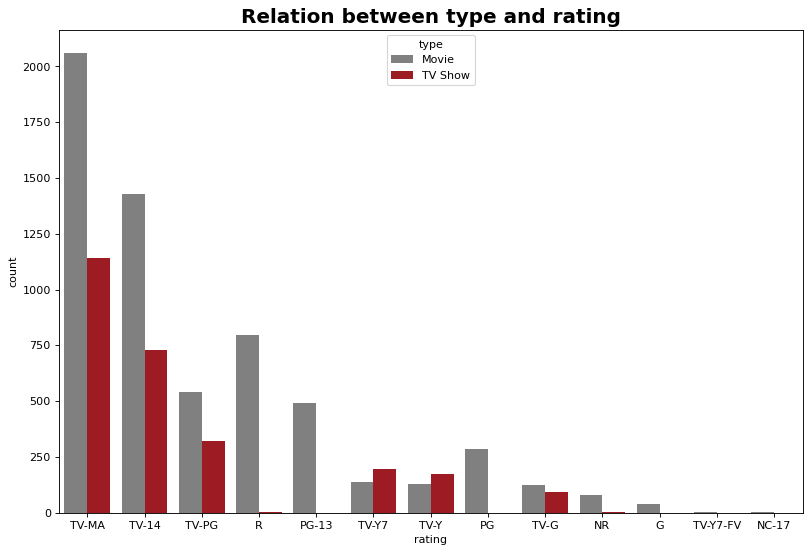

In [19]:
plt.figure(figsize = (12,8), dpi = 80)
sns.countplot(x = "rating", hue = "type", data = df, order = df['rating'].value_counts().index)
plt.title("Relation between type and rating", fontsize = 18, fontweight = "bold")
plt.show()

### 5. Top 20 producing countries

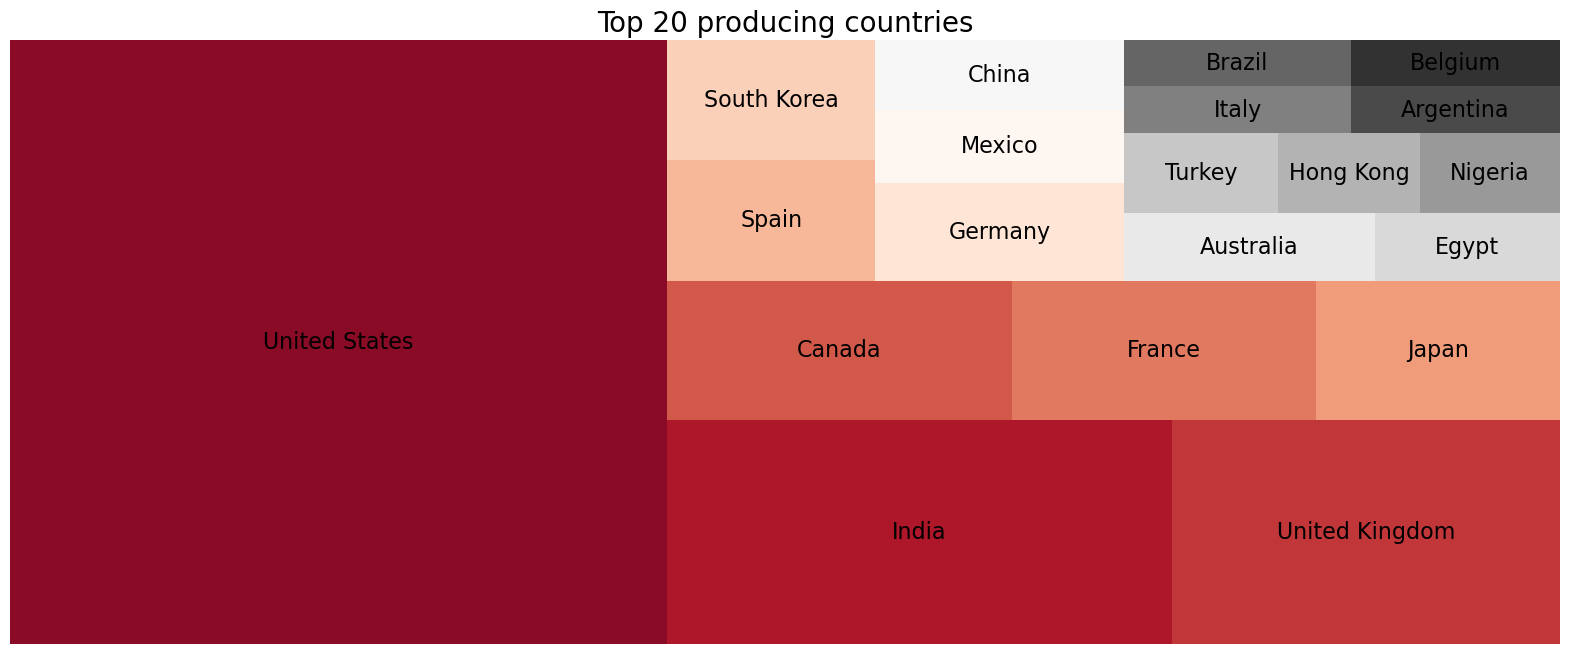

In [22]:
top20_country = country_counting[:20]

y = top20_country
fig = plt.figure(figsize=(20, 8), dpi = 100)

squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':16})
plt.title('Top 20 producing countries', fontsize = 20)
plt.axis('off')
plt.show()

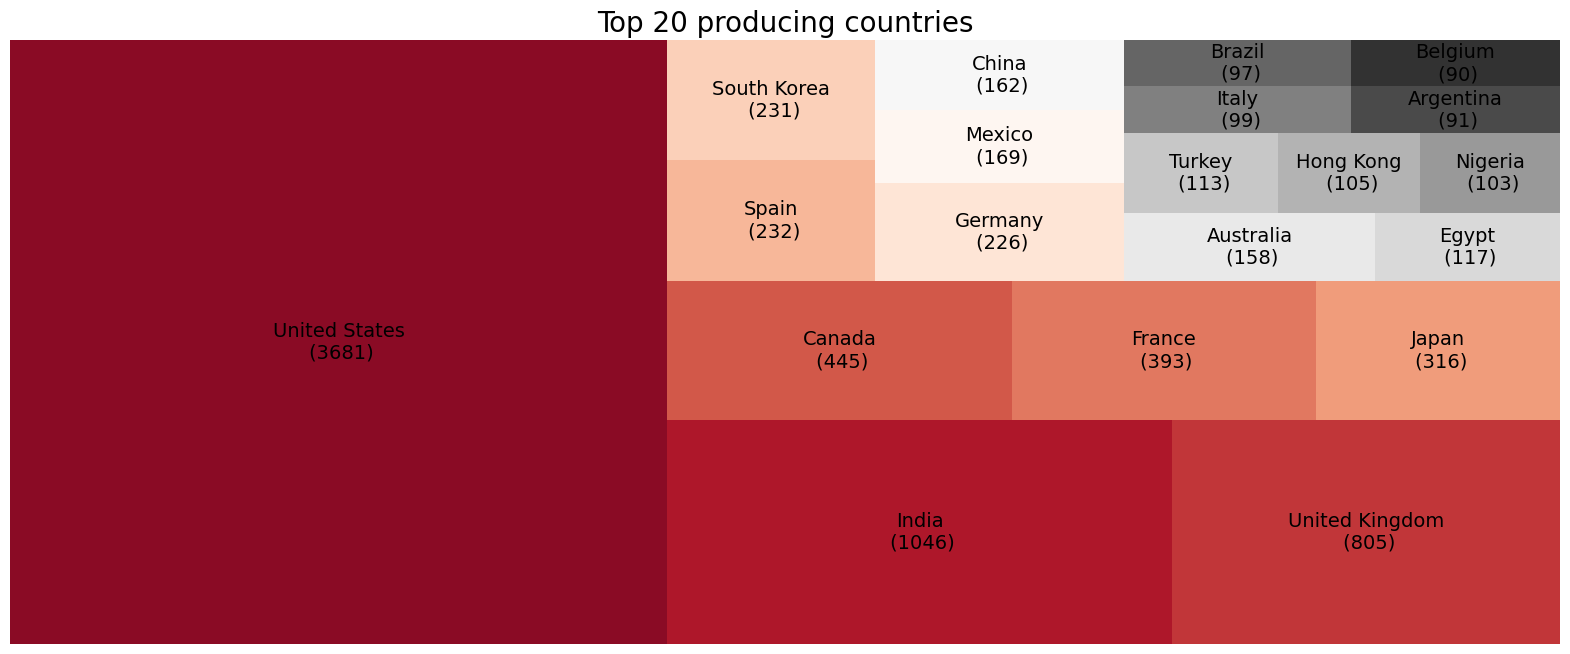

In [23]:
top20_country = country_counting[:20]

y = top20_country

label2 = [ str(idx) + "\n (" + str(val) + ")" for idx, val in y.items()]

fig = plt.figure(figsize=(20, 8), dpi = 100)

squarify.plot(sizes = y.values, label = label2, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14})
plt.title('Top 20 producing countries', fontsize = 20)
plt.axis('off')
plt.show()

In [24]:
y

United States     3681
India             1046
United Kingdom     805
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          158
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy               99
Brazil              97
Argentina           91
Belgium             90
dtype: int64

### 6. Comparing between the types that the top countries produce

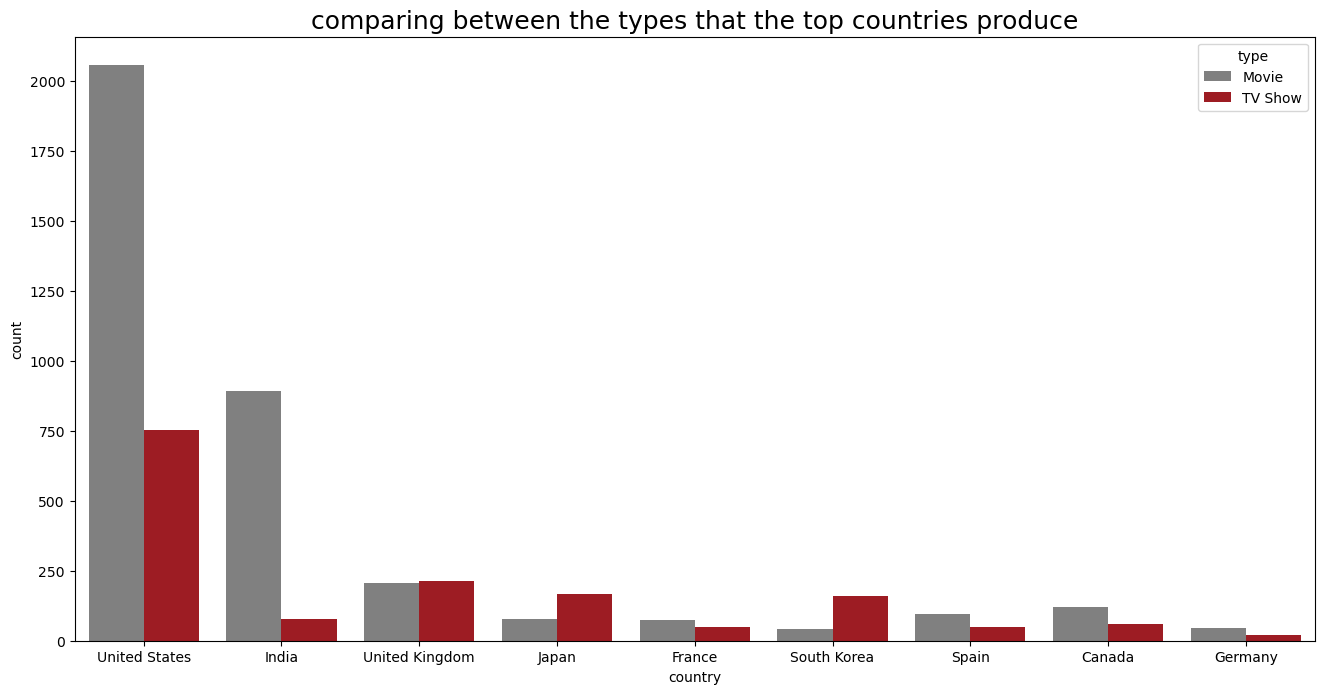

In [25]:
top_productive_countries = df[(df['country']=='United States')|
                            (df['country']=='India')|
                            (df['country']=='United Kingdom')|
                            (df['country']=='Japan')|
                             (df['country']=='Canada')|
                             (df['country']=='France')|
                            (df['country']=='Spain')|
                            (df['country']=='Germany')|
                            (df['country']=='South Korea')]

plt.figure(figsize = (16,8), dpi = 100)
sns.countplot(x = 'country',
              hue = 'type',
              data = top_productive_countries)
plt.title('comparing between the types that the top countries produce', fontsize = 18)
plt.show()

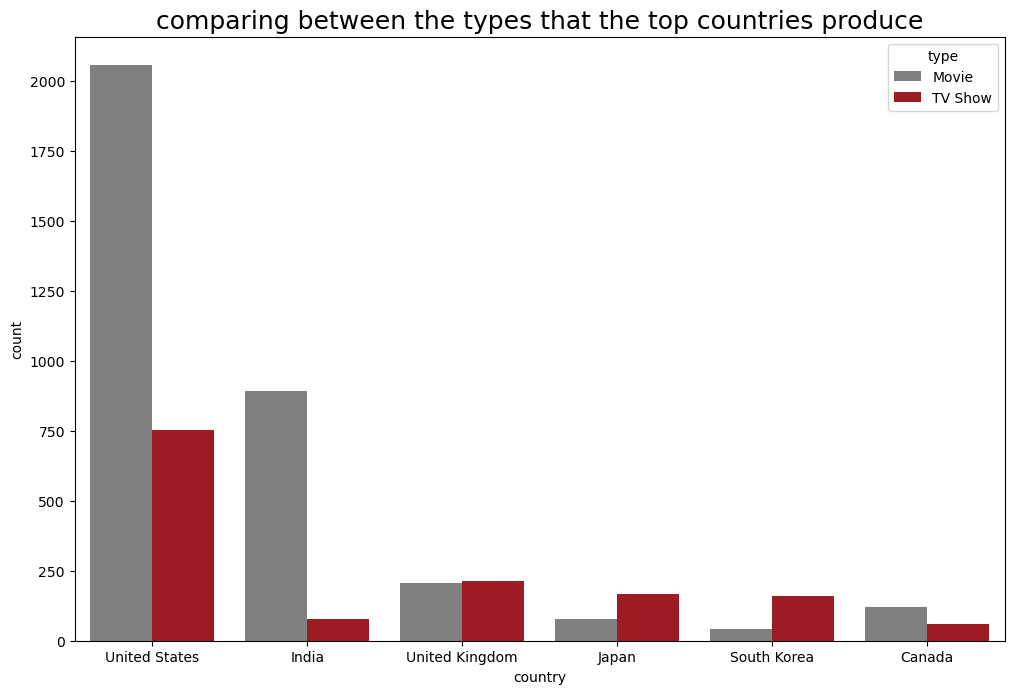

In [26]:
top_productive_countries = df[(df['country']=='United States')|
                            (df['country']=='India')|
                            (df['country']=='United Kingdom')|
                            (df['country']=='Japan')|
                             (df['country']=='Canada') |
                             (df['country']=='South Korea') ]

plt.figure(figsize = (12,8), dpi = 100)
sns.countplot(x = 'country',
              hue = 'type',
              data = top_productive_countries)
plt.title('comparing between the types that the top countries produce', fontsize = 18)
plt.show()

## Duration analysis

In [27]:
# Changing datatype

movies['duration'] = movies['duration'].str.replace(' min', '')
duration = movies['duration'].astype('float')
#duration.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15380\3665462826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '')


### 7. Distribution of duration of Movie on Netflix

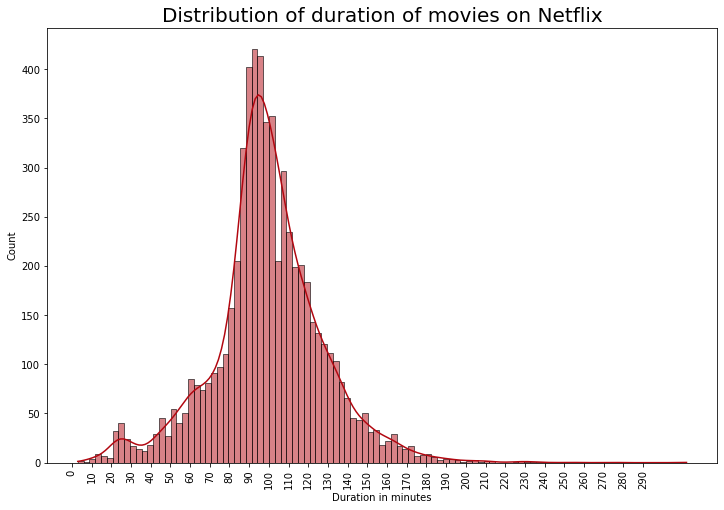

In [28]:
plt.figure(figsize=(12,8))

graph = sns.histplot(duration, color = '#b20710', kde = True)
plt.xlabel("Duration in minutes")
plt.ylabel("Count")
plt.title("Distribution of duration of movies on Netflix", fontsize = 20)
plt.xticks(range(0,300,10), rotation = 90)
    
plt.show()

## Genre analysis

### 8. Most popular genre

In [30]:
df['Genre_main'] = df['listed_in'].apply(lambda x: x.split(",")[0])

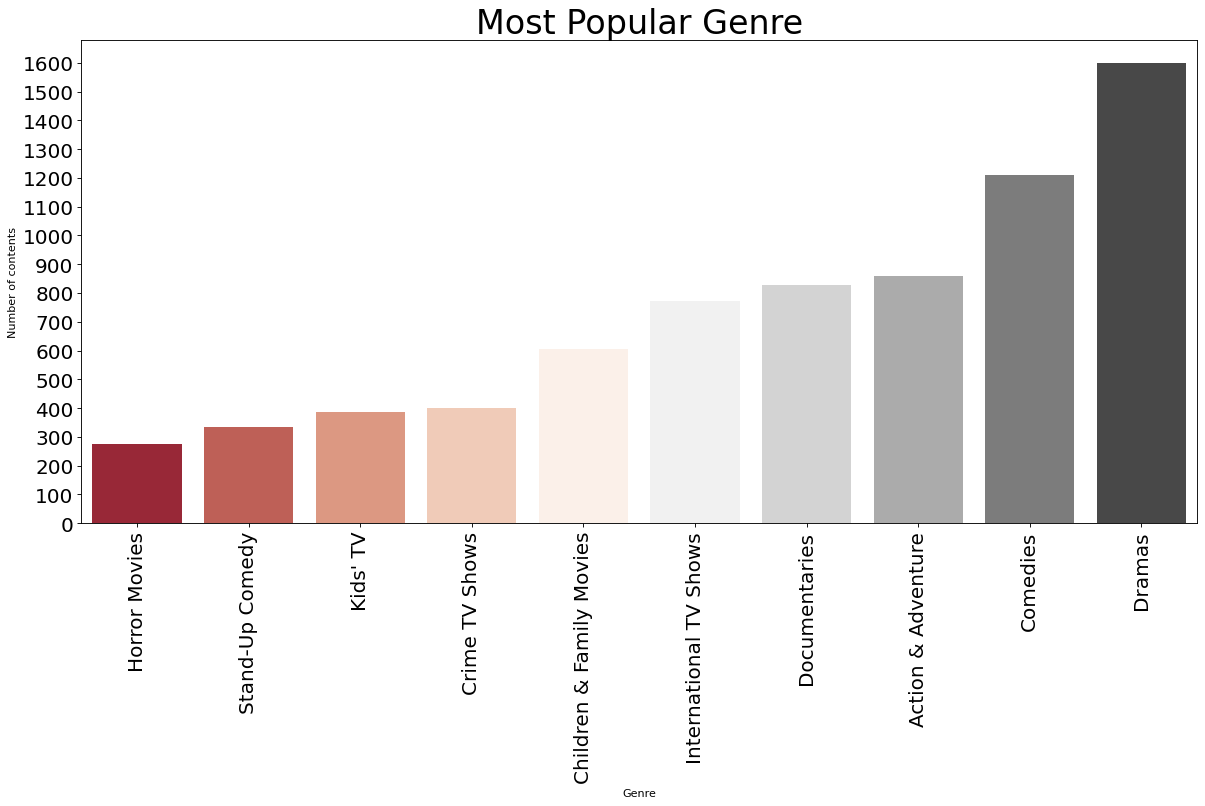

In [31]:
plt.figure(figsize=(18,8), dpi = 80)

sns.barplot(x = df.Genre_main.value_counts()[:10].sort_values().index, 
            y = df.Genre_main.value_counts()[:10].sort_values().values,
            palette='RdGy');
plt.title('Most Popular Genre', fontsize = 30)
# plt.yticks(df.Genre_main.value_counts()[:10].sort_values().values);
plt.yticks(range(0,1700,100), fontsize = 18)
plt.xticks(rotation = 90, fontsize = 18)
plt.xlabel('Genre');
plt.ylabel('Number of contents');

## Time series analysis

### 9. Yearwise leadtime - how quick content added?

In [32]:
# creating a series of time data
add_year = df["added_year"].value_counts()
release = df["release_year"].value_counts()

# creating a dataframe
add_df = pd.DataFrame({"year" : add_year.index,
                      "added_year" : add_year.values})
release_df = pd.DataFrame({"year" : release.index,
                           "release_year" : release.values})

year_df = pd.merge(add_df, release_df, how = "right", on = "year")
year_df.fillna("0", inplace = True)
year_df["added_year"] = year_df.added_year.astype("int")

year_df = year_df.sort_values("year", ascending = False).reset_index(drop = True)

Text(2019.5, 3000, 'Covid-19')

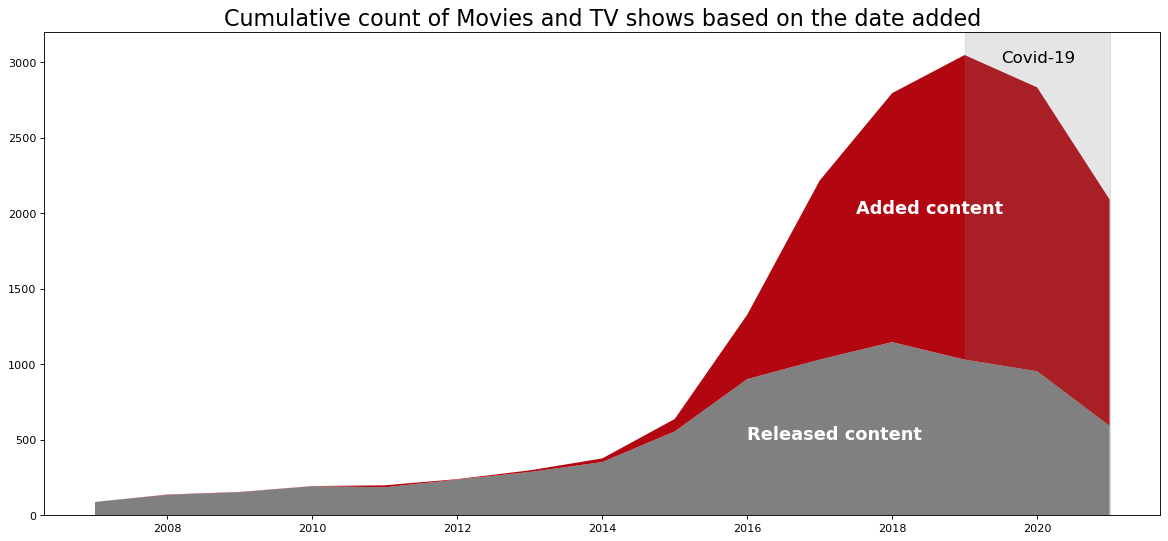

In [35]:
# visualization

fig, ax = plt.subplots(figsize = (18,8), dpi = 80)

ax.stackplot(year_df.year[0:15], 
             year_df.release_year[0:15], 
             year_df.added_year[0:15], 
             baseline = "zero"
            )

# legend
ax.text(2017.5, 2000, "Added content", {"fontsize" : "16", "color":"white", "weight":"bold"})
ax.text(2016, 500, "Released content",{"fontsize" : "16", "color":"white", "weight":"bold"}) 

# title
plt.title("Cumulative count of Movies and TV shows based on the date added", fontsize = 20)

# region of interest
ax.axvspan(2019, 2021, color = "grey", alpha = 0.2)
ax.text(2019.5, 3000, "Covid-19", {"fontsize" : "15"})

### 10. Visualization of release year - which year is most productive ?

Text(0.5, 1.0, 'Visualization of Release Year - Which year is most productive?')

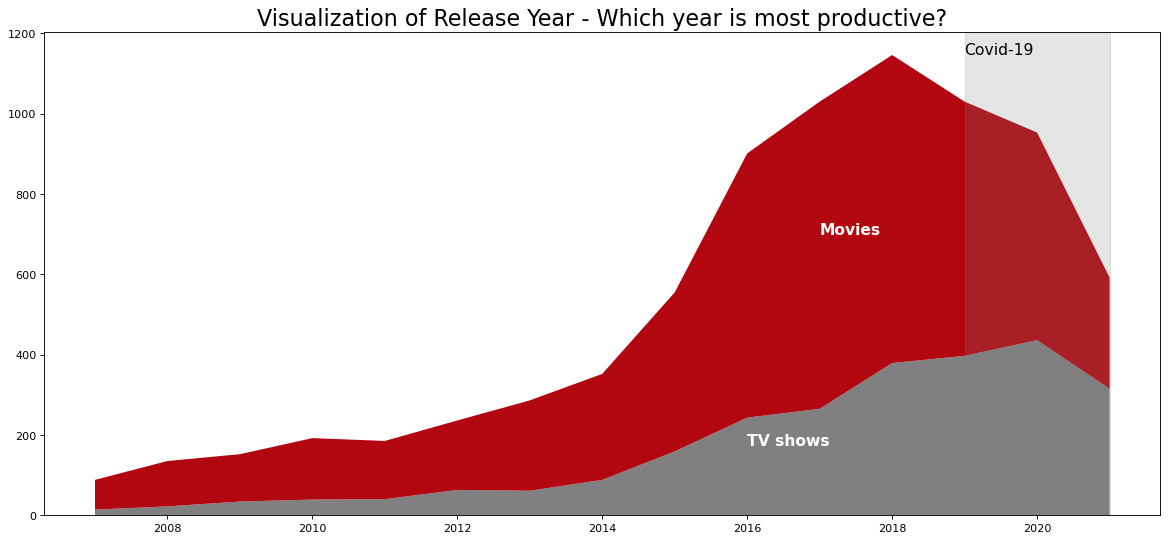

In [36]:
# For analysis, make movie data & TV Show data.
movies = df[df["type"] == "Movie"].release_year.value_counts()
tvshow = df[df["type"] == "TV Show"].release_year.value_counts()

# creating a dataframe
Tv_df = pd.DataFrame({'year': tvshow.index, 'Tv_count': tvshow.values})
Movie_df = pd.DataFrame({'year': movies.index, 'Movie_count': movies.values})

rel_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
rel_data.fillna('0', inplace = True)
rel_data['Tv_count'] = rel_data.Tv_count.astype('int64')
rel_data = rel_data.sort_values('year', ascending = False).reset_index(drop = True)


## visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 80)


# stackplot
ax.stackplot(rel_data.year[0:15], 
             rel_data.Tv_count[0:15],
             rel_data.Movie_count[0:15],
             baseline = 'zero')

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019, 1147, 'Covid-19', {'fontsize': '14'})

# legend
ax.text(2017, 700, "Movies", {'fontsize':'14', 'color':'white', 'weight':'bold'})
ax.text(2016, 175, "TV shows",{'fontsize':'14', 'color':'white','weight':'bold'}) 

#title
 
plt.title('Visualization of Release Year - Which year is most productive?', fontsize = 20)


#plt.box(on = None)

#ax.axes.get_yaxis().set_visible(False)

## Popularity and rating analysis

## Merge data

In [37]:
df["title"] = df["title"].apply(lambda x:x.lower())
df1["title"] = df1["title"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [38]:
df3 = df.merge(df1, how = "left",
         left_on = "title",
         right_on = "title")

In [39]:
df3_clean = df3.dropna(subset = ["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"])
df3_clean.age_certification.fillna("No rating", inplace = True)

df3_clean.drop(columns = ["type_y", "seasons", "release_year_y", "description_y", "imdb_id", "id"], inplace = True)
df3_clean.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15380\2405442123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_clean.age_certification.fillna("No rating", inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15380\2405442123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_clean.drop(columns = ["type_y", "seasons", "release_year_y", "description_y", "imdb_id", "id"], inplace = True)


show_id                 0
type_x                  0
title                   0
director                0
cast                    0
country                 0
date_added              0
release_year_x          0
rating                  0
duration                0
listed_in               0
description_x           0
added_year              0
added_month             0
age_rating              0
Genre_main              0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [40]:
print(df.shape)
print(df1.shape)
print(df3_clean.shape)

(8790, 16)
(5850, 15)
(3741, 24)


### 11. Analyzing the correlation among different features

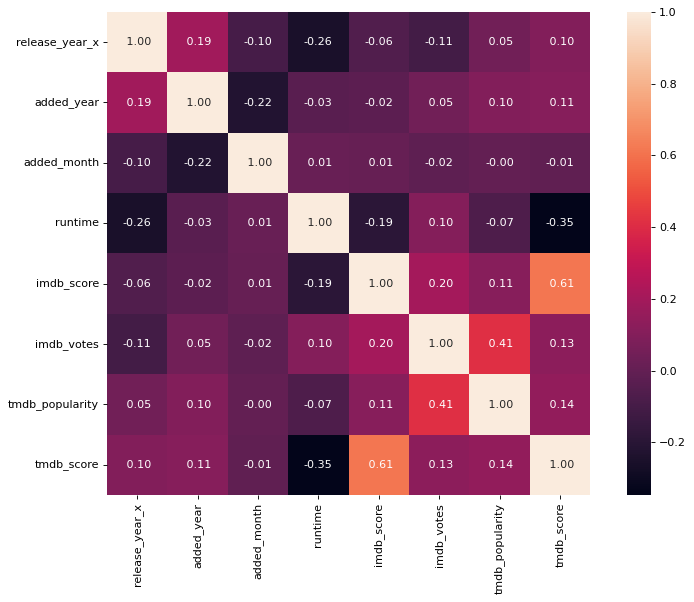

In [41]:
# corr heatmap
corrmat_df = df3_clean.corr()

fig, ax = plt.subplots(figsize = (12,8), dpi = 80)

hm_df = sns.heatmap(corrmat_df, cbar = True, annot = True,
                    square = True,
                   fmt = " .2f", annot_kws = {"size" : 10},
                   yticklabels = corrmat_df.index,
                   xticklabels = corrmat_df.index)
plt.show()

### 12 Correlation between IMDB score vs TMDB score

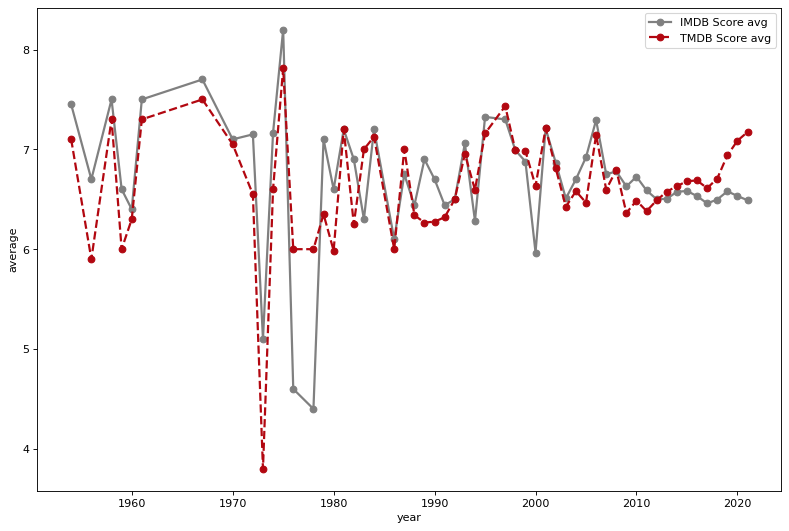

In [44]:
mean_release_year = df3_clean.groupby(["release_year_x"]).mean()
plt.figure(figsize = (12,8), dpi = 80)

plt.plot(mean_release_year.index, 
         mean_release_year["imdb_score"], 
         label = "IMDB Score avg",
         linewidth = 2,
         marker = "o")
plt.plot(mean_release_year.index, 
         mean_release_year["tmdb_score"], 
         label = "TMDB Score avg",
         linewidth = 2,
         marker = "o",
         linestyle = "--")

plt.xlabel("year")
plt.ylabel("average")
plt.legend()
plt.show()

In [45]:
from scipy.stats.stats import pearsonr
pearsonr(df3_clean["imdb_score"], df3_clean["tmdb_score"])

(0.6111153635835098, 0.0)

<Figure size 1200x800 with 0 Axes>

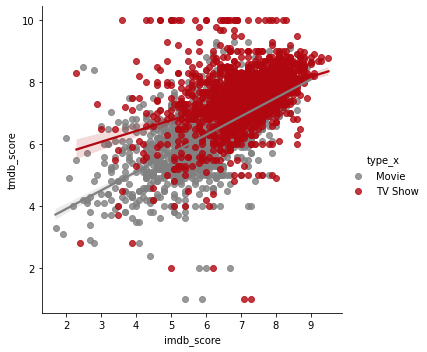

In [46]:
plt.figure(figsize = (12,8), dpi = 100)

sns.lmplot(x = "imdb_score", 
           y = "tmdb_score",
           hue = "type_x",
          data = df3_clean)